# Web Scraping Popular Books on Goodreads using Python

In [1]:
# importing required libraries
import requests
import os
from bs4 import BeautifulSoup
import pandas as pd
import csv
import time

from IPython.display import display, Image

In [3]:
base_url = "https://www.goodreads.com"
genres_url = "https://www.goodreads.com/genres"

In [4]:
response = requests.get(genres_url)
response.status_code

200

# Exploration phase

First I will extract the genres of the books from the genres page

In [5]:
doc = BeautifulSoup(response.text, 'html.parser')

In [6]:
genre_tags = doc.find_all('div', class_="rightContainer")[0].find_all('a')

In [7]:
genre_names = [tag.text for tag in genre_tags][1:-1]
genre_links = [tag['href'] for tag in genre_tags][1:-1]

In [8]:
genre_links[:5], genre_names[:5]

(['/genres/art',
  '/genres/biography',
  '/genres/business',
  '/genres/chick-lit',
  '/genres/children-s'],
 ['Art', 'Biography', 'Business', 'Chick Lit', "Children's"])

Now I will append these genre links to the base url link which will help in extracting the most popular books of each genre. I will be using a dictionary to easily store them where the genre_names will be the keys and genre links will be the values for the dictionary.

In [9]:
# genre_links_dict = {name: base_url + link for (name, link) in zip(genre_names, genre_links)}
# genre_links_dict

In [10]:
num_pages = len(genre_links)
num_pages

40

By visiting the art genre page, it looks like the page contains the newly released books, giveaways books and the most popular books. I am interested about the most popular ones but on the page there are only limited amount of books shown so clicking on *more books* another page opened which include the full list of the most read/popular books of the art genre. This page is the most useful for my analysis. 

So, now let's start with art genre and look at the html for this page

Now let's update the genre links dict to account for the most read books

In [11]:
genre_links_dict = {name: genres_url + "/most_read" + link[7:] for (name, link) in zip(genre_names, genre_links)}

In [12]:
genre_links_dict["Children's"] = "https://www.goodreads.com/genres/most_read/childrens"
genre_links_dict['Gay and Lesbian'] = "https://www.goodreads.com/genres/most_read/lgbt"
genre_links_dict['Humor and Comedy'] = "https://www.goodreads.com/genres/most_read/humor"
genre_links_dict

{'Art': 'https://www.goodreads.com/genres/most_read/art',
 'Biography': 'https://www.goodreads.com/genres/most_read/biography',
 'Business': 'https://www.goodreads.com/genres/most_read/business',
 'Chick Lit': 'https://www.goodreads.com/genres/most_read/chick-lit',
 "Children's": 'https://www.goodreads.com/genres/most_read/childrens',
 'Christian': 'https://www.goodreads.com/genres/most_read/christian',
 'Classics': 'https://www.goodreads.com/genres/most_read/classics',
 'Comics': 'https://www.goodreads.com/genres/most_read/comics',
 'Contemporary': 'https://www.goodreads.com/genres/most_read/contemporary',
 'Cookbooks': 'https://www.goodreads.com/genres/most_read/cookbooks',
 'Crime': 'https://www.goodreads.com/genres/most_read/crime',
 'Ebooks': 'https://www.goodreads.com/genres/most_read/ebooks',
 'Fantasy': 'https://www.goodreads.com/genres/most_read/fantasy',
 'Fiction': 'https://www.goodreads.com/genres/most_read/fiction',
 'Gay and Lesbian': 'https://www.goodreads.com/genres/mos

### New releases

In [13]:
genre_new_release = {genre: genre_links_dict[genre].replace('most_read', 'new_releases') for genre in genre_links_dict}
genre_new_release

{'Art': 'https://www.goodreads.com/genres/new_releases/art',
 'Biography': 'https://www.goodreads.com/genres/new_releases/biography',
 'Business': 'https://www.goodreads.com/genres/new_releases/business',
 'Chick Lit': 'https://www.goodreads.com/genres/new_releases/chick-lit',
 "Children's": 'https://www.goodreads.com/genres/new_releases/childrens',
 'Christian': 'https://www.goodreads.com/genres/new_releases/christian',
 'Classics': 'https://www.goodreads.com/genres/new_releases/classics',
 'Comics': 'https://www.goodreads.com/genres/new_releases/comics',
 'Contemporary': 'https://www.goodreads.com/genres/new_releases/contemporary',
 'Cookbooks': 'https://www.goodreads.com/genres/new_releases/cookbooks',
 'Crime': 'https://www.goodreads.com/genres/new_releases/crime',
 'Ebooks': 'https://www.goodreads.com/genres/new_releases/ebooks',
 'Fantasy': 'https://www.goodreads.com/genres/new_releases/fantasy',
 'Fiction': 'https://www.goodreads.com/genres/new_releases/fiction',
 'Gay and Lesbi

## More genres

In [13]:
imp_genre = []

In [14]:
# pages = "https://www.goodreads.com/genres/list?page=14"

In [96]:
resp = requests.get(pages)
soup = BeautifulSoup(resp.text, 'html.parser')

In [97]:
l = len(soup.find_all('div', class_='shelfStat'))
for i in range(l):
    name, num_books = soup.find_all('div', class_='shelfStat')[i].text.strip().split()[:-1]
    if len(num_books.split(',')) >= 3:
        imp_genre.append({'Genre': name, 'Books': num_books})
print(imp_genre)

[{'Genre': '20th-century', 'Books': '1,231,737'}, {'Genre': 'action', 'Books': '1,172,660'}, {'Genre': 'adult', 'Books': '4,534,807'}, {'Genre': 'adult-fiction', 'Books': '2,086,610'}, {'Genre': 'adventure', 'Books': '2,713,177'}, {'Genre': 'amazon', 'Books': '1,359,837'}, {'Genre': 'american', 'Books': '1,140,096'}, {'Genre': 'animals', 'Books': '1,063,942'}, {'Genre': 'art', 'Books': '1,346,609'}, {'Genre': 'biography', 'Books': '2,703,244'}, {'Genre': 'business', 'Books': '1,360,475'}, {'Genre': 'chick-lit', 'Books': '1,790,847'}, {'Genre': 'childrens', 'Books': '2,511,692'}, {'Genre': 'christian', 'Books': '1,565,619'}, {'Genre': 'classics', 'Books': '8,025,658'}, {'Genre': 'comics', 'Books': '4,574,108'}, {'Genre': 'contemporary', 'Books': '7,504,344'}, {'Genre': 'contemporary-romance', 'Books': '2,445,453'}, {'Genre': 'crime', 'Books': '2,474,234'}, {'Genre': 'dark', 'Books': '1,253,172'}, {'Genre': 'drama', 'Books': '1,998,315'}, {'Genre': 'dystopia', 'Books': '1,219,940'}, {'Ge

action, adult, adventure, dark, drama, dystopia, erotica, family, literature, mythology, novels, politics, short-stories, supernatural,  war

This looks kinda neat.

In [100]:
pd.DataFrame(imp_genre)

,Genre,Books
0,20th-century,"1,231,737"
1,action,"1,172,660"
2,adult,"4,534,807"
3,adult-fiction,"2,086,610"
4,adventure,"2,713,177"
...,...,...
68,unfinished,"1,575,723"
69,urban-fantasy,"2,063,199"
70,vampires,"1,156,467"
71,war,"1,080,035"


In [20]:
response = requests.get(genre_new_release['Christian'])
print(response.status_code)
doc = BeautifulSoup(response.text, 'html.parser')

200


In [21]:
" ".join(doc.text.split('\n\n\n')[1].split()[:-1])

'Christian'

In [22]:
len(doc.find_all('div', class_='leftAlignedImage'))

21

In [23]:
doc.find_all('div', class_='leftAlignedImage')[1].script.text.split('>')[2][:-4]

'The Happy Life of Isadora Bentley'

In [24]:
get_books(doc)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


[{'Title': 'The Best Summer of Our Lives',
  'Author': 'Rachel Hauck',
  'Score': '4.14',
  'Ratings': '479',
  'Published': '2023',
  'Genre': 'Christian',
  'Description': "Twenty years ago, the summer of \\'77 was supposed to be the best summer of Summer Wilde\\'s life. She and her best friends, Spring, Autumn, and Snow--the Four Seasons--had big plans.\\n\\nBut those plans never had a chance. After a teenage prank gone awry, the Seasons found themselves on a bus to Tumbleweed, &quot;Nowhere,&quot; Oklahoma, to spend eight weeks as camp counselors. All four of them arrived with hidden secrets and buried fears, and the events that unfolded in those two months forever altered their friendships, their lives, and their futures.\\n\\nNow, thirtysomething, Summer is at a crossroads. When her latest girl band leaves her in a motel outside Tulsa, she is forced to face the shadows of her past. Returning to the place where everything changed, she soon learns Tumbleweed is more than a town she

In [13]:
# Extract all books using the extracted html from the page
def get_books(doc):
    all_books = []
    books_on_page = len(doc.find_all('div', class_='leftAlignedImage'))
    genre = " ".join(doc.text.split('\n\n\n')[1].split()[:-1])
    for i in range(books_on_page): 
        try:
            if i == 0:
                title = doc.find_all('div', class_='leftAlignedImage')[i].find_all('script')[1].text.split('>')[2][:-4]
                author = doc.find_all('div', class_='leftAlignedImage')[i].find_all('script')[1].text.split('>')[6][:-4]
                score = doc.find_all('div', class_='leftAlignedImage')[i].find_all('script')[1].text.split('>')[24].strip().split()[0]
                rating = doc.find_all('div', class_='leftAlignedImage')[i].find_all('script')[1].text.split('>')[24].strip().split()[4]
                pub = doc.find_all('div', class_='leftAlignedImage')[i].find_all('script')[1].text.split('>')[25].strip().split()[2][:-2]
                desc = doc.find_all('div', class_='leftAlignedImage')[i].find_all('script')[1].text.split('>')[30][:-7]
            else:
                title = doc.find_all('div', class_='leftAlignedImage')[i].script.text.split('>')[2][:-4]
                author = doc.find_all('div', class_='leftAlignedImage')[i].script.text.split('>')[6][:-4]
                score = doc.find_all('div', class_='leftAlignedImage')[i].script.text.split('>')[24].strip().split()[0]
                rating = doc.find_all('div', class_='leftAlignedImage')[i].script.text.split('>')[24].strip().split()[4]
                pub = doc.find_all('div', class_='leftAlignedImage')[i].script.text.split('>')[25].strip().split()[2][:-2]
                desc = doc.find_all('div', class_='leftAlignedImage')[i].script.text.split('>')[30][:-7]
        except:
            if i == 0:
                title = doc.find_all('div', class_='leftAlignedImage')[i].find_all('script')[1].text.split('>')[2][:-4]
                author = doc.find_all('div', class_='leftAlignedImage')[i].find_all('script')[1].text.split('>')[6][:-4]
                score = doc.find_all('div', class_='leftAlignedImage')[i].find_all('script')[1].text.split('>')[22].strip().split()[0]
                rating = doc.find_all('div', class_='leftAlignedImage')[i].find_all('script')[1].text.split('>')[22].strip().split()[4]
                pub = doc.find_all('div', class_='leftAlignedImage')[i].find_all('script')[1].text.split('>')[23].strip().split()[2][:-2]
                desc = doc.find_all('div', class_='leftAlignedImage')[i].find_all('script')[1].text.split('>')[28][:-7]
            else:
                try:
                    title = doc.find_all('div', class_='leftAlignedImage')[i].script.text.split('>')[2][:-4]
                    author = doc.find_all('div', class_='leftAlignedImage')[i].script.text.split('>')[6][:-4]
                    score = doc.find_all('div', class_='leftAlignedImage')[i].script.text.split('>')[22].strip().split()[0]
                    rating = doc.find_all('div', class_='leftAlignedImage')[i].script.text.split('>')[22].strip().split()[4]
                    pub = doc.find_all('div', class_='leftAlignedImage')[i].script.text.split('>')[23].strip().split()[2][:-2]
                    desc = doc.find_all('div', class_='leftAlignedImage')[i].script.text.split('>')[28][:-7]
                except:
                    continue
            
        book_info ={'Title': title,
                    'Author': author,
                    'Score': score,
                    'Ratings': rating,
                    'Published': pub,
                    'Genre': genre,
                    'Description': desc}
        print(i)
        all_books.append(book_info)
    print("Total books scraped:", len(all_books))
    return all_books

In [37]:
# Takes in list of dicts returned by above function
def make_csv(dic, filename):
    with open(filename, 'a', encoding='utf-8') as f:
        w = csv.DictWriter(f, dic[0].keys())
        w.writerows(dic)

In [24]:
# Ebooks doesn't have any books
def book_scraper():
    for i, genre in enumerate(genre_links_dict):
        if genre == 'Ebooks':
            continue
        if os.path.exists(f'{genre}.csv'):
            print(f"{genre}.csv already exists. Skipping....")
            continue
        time.sleep(2*(i%10))
        print(f"Scraping {genre} books")
        response = requests.get(genre_links_dict[genre])
        doc = BeautifulSoup(response.text, 'html.parser')
        genre_dict = get_books(doc)
        make_csv(genre_dict, f"{genre}.csv")
        print(f"Writing to file {genre}.csv")
        print(f"Scraped {i+1}/{len(genre_links_dict)} genres")
        print('='*30)

In [25]:
%%time
book_scraper()

Scraping Art books
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Writing to file Art.csv
Scraped 1/40 genres
Scraping Biography books
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Writing to file Biography.csv
Scraped 2/40 genres
Scraping Business books
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
8

86
87
88
89
90
91
92
93
94
95
96
97
98
99
Writing to file Memoir.csv
Scraped 22/40 genres
Scraping Music books
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Writing to file Music.csv
Scraped 23/40 genres
Scraping Mystery books
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Writing to file Mystery.csv
Scraped 24/40 genres
Scraping Nonfiction books
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57


In [26]:
# Ebooks, cookbooks(has this time), spirituality doesn't have any books
def book_scrape_new():
    for i, genre in enumerate(genre_new_release):
#         if genre in list(genre_new_release.keys())[:36]:
#             continue
        if genre in ['Ebooks', 'Spirituality']:
            continue
        time.sleep(2*(i%10))
        print(f"Scraping {genre} new released books")
        response = requests.get(genre_new_release[genre])
        doc = BeautifulSoup(response.text, 'html.parser')
        genre_dict = get_books(doc)
        make_csv(genre_dict, f"{genre}.csv")
        print(f"Writing new files to {genre}.csv")
        print(f"Scraped {i+1}/{len(genre_new_release)} genres")
        print('='*30)

In [27]:
%%time
book_scrape_new()

Scraping Art new released books
0
1
2
3
4
5
Writing new files to Art.csv
Scraped 1/40 genres
Scraping Biography new released books
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
Writing new files to Biography.csv
Scraped 2/40 genres
Scraping Business new released books
0
1
2
3
4
5
Writing new files to Business.csv
Scraped 3/40 genres
Scraping Chick Lit new released books
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
Writing new files to Chick Lit.csv
Scraped 4/40 genres
Scraping Children's new released books
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
Writing new files to Children's.csv
Scraped 5/40 genres
Scraping Christian new released books
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
Writing new files to Christian.csv
Scraped 6/40 genres
Scraping Classics new released books
0
Writing new files to Classics.csv
Scraped 7/40 genres
Scraping Comics new released books
0
1

52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
Writing new files to Science Fiction.csv
Scraped 33/40 genres
Scraping Self Help new released books
0
1
2
3
Writing new files to Self Help.csv
Scraped 34/40 genres
Scraping Suspense new released books
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
Writing new files to Suspense.csv
Scraped 35/40 genres
Scraping Sports new released books
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
Writing new files to Sports.csv
Scraped 37/40 genres
Scraping Thriller new released books
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
7

1691415052.6828375

## Combining all files

In [3]:
genre_csvs = []
book_path = 'C:\\Users\\relat\\Academics\\Web scraping\\Goodreads'
for x, _, files in os.walk(book_path):
    for i, f in enumerate(files):
        if f not in ['books.csv', 'book_descriptions.csv', 'book_genres.csv', 'book_metadata.csv'] and f.endswith('.csv'):
            genre_csvs.append(f)
print(len(genre_csvs))
genre_csvs

39


['Art.csv',
 'Biography.csv',
 'Business.csv',
 'Chick Lit.csv',
 "Children's.csv",
 'Christian.csv',
 'Classics.csv',
 'Comics.csv',
 'Contemporary.csv',
 'Cookbooks.csv',
 'Crime.csv',
 'Fantasy.csv',
 'Fiction.csv',
 'Gay and Lesbian.csv',
 'Graphic Novels.csv',
 'Historical Fiction.csv',
 'History.csv',
 'Horror.csv',
 'Humor and Comedy.csv',
 'Manga.csv',
 'Memoir.csv',
 'Music.csv',
 'Mystery.csv',
 'Nonfiction.csv',
 'Paranormal.csv',
 'Philosophy.csv',
 'Poetry.csv',
 'Psychology.csv',
 'Religion.csv',
 'Romance.csv',
 'Science Fiction.csv',
 'Science.csv',
 'Self Help.csv',
 'Spirituality.csv',
 'Sports.csv',
 'Suspense.csv',
 'Thriller.csv',
 'Travel.csv',
 'Young Adult.csv']

In [89]:
all_genres_df = pd.DataFrame()
for f in genre_csvs:
    print(f)
    df = pd.read_csv(f, header=None)
    print("Total books:", len(df))
#     df.columns=['Title', 'Author', 'Score', 'Ratings', 'Published', 'Genre', 'Description']
#     df.drop('Description', axis=1, inplace=True)
    print("Duplicate Rows:", df.duplicated().sum())
    print("Deleted duplicate rows")
    df.drop_duplicates(inplace=True)
    print("Total books after removing duplicates:", len(df))
    print('*'*30)
    all_genres_df = pd.concat([all_genres_df, df], ignore_index=True)
all_genres_df.columns = ['Title', 'Author', 'Score', 'Ratings', 'Published', 'Genre', 'Description']
all_genres_df

Art.csv
Total books: 206
Duplicate Rows: 41
Deleted duplicate rows
Total books after removing duplicates: 165
******************************
Biography.csv
Total books: 230
Duplicate Rows: 27
Deleted duplicate rows
Total books after removing duplicates: 203
******************************
Business.csv
Total books: 206
Duplicate Rows: 22
Deleted duplicate rows
Total books after removing duplicates: 184
******************************
Chick Lit.csv
Total books: 217
Duplicate Rows: 25
Deleted duplicate rows
Total books after removing duplicates: 192
******************************
Children's.csv
Total books: 243
Duplicate Rows: 15
Deleted duplicate rows
Total books after removing duplicates: 228
******************************
Christian.csv
Total books: 223
Duplicate Rows: 34
Deleted duplicate rows
Total books after removing duplicates: 189
******************************
Classics.csv
Total books: 151
Duplicate Rows: 1
Deleted duplicate rows
Total books after removing duplicates: 150
**********

,Title,Author,Score,Ratings,Published,Genre,Description
0,"The Collector (Gabriel Allon, #23)",Daniel Silva,4.55,"5,246",2023.0,Art,Legendary art restorer and spy Gabriel Allon j...
1,Horse,Geraldine Brooks,4.33,"84,171",2022.0,Art,"\n A discarded painting in a junk pile, a ske..."
2,When the Rain Ends,Mary Ellen Taylor,4.16,"16,145",2023.0,Art,From The Brighter the Light author Mary Ellen ...
3,Now Is Not the Time to Panic,Kevin Wilson,3.71,"39,714",2022.0,Art,From the New York Times bestselling author of ...
4,Still Life,Sarah Winman,4.17,"53,755",2021.0,Art,"Tuscany, 1944: As Allied troops advance and bo..."
...,...,...,...,...,...,...,...
7795,"The Raven Boys (The Raven Cycle, #1)",Maggie Stiefvater,4.05,"350,943",2012,Young Adult,NaN
7796,"Uglies (Uglies, #1)",Scott Westerfeld,3.85,"643,378",2005,Young Adult,NaN
7797,Aristotle and Dante Discover the Secrets of th...,Benjamin Alire Sáenz,4.33,"552,663",2012,Young Adult,NaN
7798,The Outsiders,S.E. Hinton,4.12,"1,248,484",1967,Young Adult,NaN


In [90]:
all_genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7800 entries, 0 to 7799
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        7800 non-null   object 
 1   Author       7800 non-null   object 
 2   Score        7800 non-null   float64
 3   Ratings      7800 non-null   object 
 4   Published    7797 non-null   object 
 5   Genre        7800 non-null   object 
 6   Description  5701 non-null   object 
dtypes: float64(1), object(6)
memory usage: 426.7+ KB


In [91]:
all_genres_df.isnull().sum()

Title             0
Author            0
Score             0
Ratings           0
Published         3
Genre             0
Description    2099
dtype: int64

In [92]:
all_genres_df[all_genres_df['Published'].isna()]

,Title,Author,Score,Ratings,Published,Genre,Description
2904,ゆびさきと恋々 7 [Yubisaki to Renren 7],Suu Morishita,4.44,554,NaN,Graphic Novels,"Un giorno, in un momento di difficoltà, una st..."
4016,ゆびさきと恋々 7 [Yubisaki to Renren 7],Suu Morishita,4.44,554,NaN,Manga,"Un giorno, in un momento di difficoltà, una st..."
5712,Scarred,Sarah Edmondson,3.94,"3,024",NaN,Religion,"CÓMO PARTICIPÉ, ESCAPÉ Y DENUNCIÉ A LA SECTA D..."


In [93]:
all_genres_df['Published'].fillna(2022, inplace=True)

In [94]:
all_genres_df.loc[5712, 'Published'] = 2019
all_genres_df.iloc[5712]

Title                                                    Scarred
Author                                          Sarah  Edmondson
Score                                                       3.94
Ratings                                                    3,024
Published                                                   2019
Genre                                                   Religion
Description    CÓMO PARTICIPÉ, ESCAPÉ Y DENUNCIÉ A LA SECTA D...
Name: 5712, dtype: object

In [95]:
all_genres_df['Title'].nunique()

4621

In [152]:
# all_genres_df.Description.nunique()

### make genre file

In [96]:
all_genres_df.Genre.unique()

array(['Art', 'Biography', 'Business', 'Chick Lit', 'Childrens',
       "Children's", 'Christian', 'Classics', 'Comics', 'Contemporary',
       'Cookbooks', 'Crime', 'Fantasy', 'Fiction', 'LGBT',
       'Gay and Lesbian', 'Graphic Novels', 'Historical Fiction',
       'History', 'Horror', 'Humor', 'Humor and Comedy', 'Manga',
       'Memoir', 'Music', 'Mystery', 'Nonfiction', 'Paranormal',
       'Philosophy', 'Poetry', 'Psychology', 'Religion', 'Romance',
       'Science Fiction', 'Science', 'Self Help', 'Spirituality',
       'Sports', 'Suspense', 'Thriller', 'Travel', 'Young Adult'],
      dtype=object)

In [99]:
# Correct names of genres
all_genres_df.Genre = all_genres_df.Genre.replace({"Children's": 'Childrens', 'Gay and Lesbian': 'LGBT', 'Humor and Comedy': 'Humor'})
all_genres_df.Genre.unique()

array(['Art', 'Biography', 'Business', 'Chick Lit', 'Childrens',
       'Christian', 'Classics', 'Comics', 'Contemporary', 'Cookbooks',
       'Crime', 'Fantasy', 'Fiction', 'LGBT', 'Graphic Novels',
       'Historical Fiction', 'History', 'Horror', 'Humor', 'Manga',
       'Memoir', 'Music', 'Mystery', 'Nonfiction', 'Paranormal',
       'Philosophy', 'Poetry', 'Psychology', 'Religion', 'Romance',
       'Science Fiction', 'Science', 'Self Help', 'Spirituality',
       'Sports', 'Suspense', 'Thriller', 'Travel', 'Young Adult'],
      dtype=object)

<Axes: >

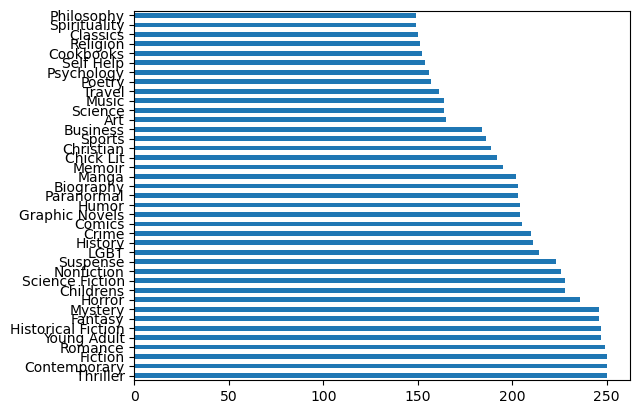

In [102]:
all_genres_df.Genre.value_counts().plot.barh()

In [103]:
combined_list = []
for title in all_genres_df['Title'].unique():
    title_df = all_genres_df[all_genres_df['Title'] == title]
    combined_list.append({'Title': title, 'genres': ",".join(set(title_df['Genre']))})
genre_combined_df = pd.DataFrame(combined_list)

In [104]:
genre_combined_df.genres[0]

'Mystery,Suspense,Art,Fiction,Crime,Thriller,Historical Fiction'

In [105]:
unq_title = genre_combined_df.Title.apply(lambda x: x.split('(')[0])
unq_title[unq_title.duplicated()]

1879    The Forbidden Wolf King 
1903          Only Good Enemies 
1920                     Hunted 
2011              Light Bringer 
2066        The Handmaid’s Tale 
2777         Flop Dead Gorgeous 
3378                     Hunted 
3439          Dead to the World 
4111                 The Secret 
4325            The Friend Zone 
4329              The Game Plan 
Name: Title, dtype: object

In [130]:
genre_final_df = genre_combined_df.sample(frac=1).reset_index(drop=True)
genre_final_df.head()

,Title,genres
0,When You Are Engulfed in Flames,Humor
1,Slaughterhouse-Five,"Fiction,Classics,Science Fiction"
2,Crow Mary,Historical Fiction
3,"The Six Deaths of the Saint (Into Shadow, #3)","Horror,Historical Fiction"
4,The Offing,"Poetry,Travel"


In [131]:
# genre_final_df.to_csv('book_genres.csv')

### make descriptions file

In [44]:
title_desc_df = all_genres_df[['Title', 'Description']].drop_duplicates(subset='Title')
title_desc_df = title_desc_df[~title_desc_df.Description.isna()]
title_desc_df

,Title,Description
0,"The Collector (Gabriel Allon, #23)",Legendary art restorer and spy Gabriel Allon j...
1,Horse,"\n A discarded painting in a junk pile, a ske..."
2,When the Rain Ends,From The Brighter the Light author Mary Ellen ...
3,Now Is Not the Time to Panic,From the New York Times bestselling author of ...
4,Still Life,"Tuscany, 1944: As Allied troops advance and bo..."
...,...,...
7741,Secret of the Moon Conch,Award-winning authors David Bowles and Guadalu...
7745,The Fight for Midnight,It’s been a rough year for Alex Collins. In th...
7746,Vivian Lantz&#39;s Second Chances,Groundhog Day meets Eighth Grade in this time-...
7747,Invisible Son,From the award-winning and critically acclaime...


In [55]:
useful_desc = []
for i in title_desc_df.index:
    if title_desc_df.loc[i, 'Description'].find('{') == -1:
        useful_desc.append(i)
len(useful_desc)

3152

In [57]:
useful_desc[-5:]

[7741, 7745, 7746, 7747, 7748]

In [65]:
desc_final_df = title_desc_df.loc[useful_desc, :].sample(frac=1).reset_index(drop=True)
desc_final_df.head()

,Title,Description
0,"Midnight Sun (The Twilight Saga, #5)",When Edward Cullen and Bella Swan met in Twili...
1,Out of the Corner,A deeply candid and refreshingly spirited memo...
2,Fangs,A love story between a vampire and a werewolf ...
3,You Can Trust Me,"For two happy couples, the cruise of a lifetim..."
4,Authentically Izzy (Skymar #1),“Dear Izzy—I feel certain there’s a book-lovin...


In [66]:
desc_final_df.to_csv('book_descriptions.csv')

In [165]:
# number of books with Multiple genres
x = genre_combined_df['genres'].apply(lambda x: x.split(','))
y = 0
for i, content in x.iteritems():
    if len(content) > 1:
        y += 1 
#         print(content)
    else:
        continue
print(y)

1574


### Clean

In [136]:
all_genres_df.drop(['Genre', 'Description'], axis=1, inplace=True)
all_genres_df.drop_duplicates(subset='Title', inplace=True)
all_genres_df

,Title,Author,Score,Ratings,Published
0,"The Collector (Gabriel Allon, #23)",Daniel Silva,4.55,"5,246",2023.0
1,Horse,Geraldine Brooks,4.33,"84,171",2022.0
2,When the Rain Ends,Mary Ellen Taylor,4.16,"16,145",2023.0
3,Now Is Not the Time to Panic,Kevin Wilson,3.71,"39,714",2022.0
4,Still Life,Sarah Winman,4.17,"53,755",2021.0
...,...,...,...,...,...
7790,Speak,Laurie Halse Anderson,4.04,"572,273",1999
7792,"Matched (Matched, #1)",Ally Condie,3.63,"756,320",2010
7794,"Red Queen (Red Queen, #1)",Victoria Aveyard,4.01,"927,621",2015
7796,"Uglies (Uglies, #1)",Scott Westerfeld,3.85,"643,378",2005


In [137]:
all_genres_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4621 entries, 0 to 7799
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      4621 non-null   object 
 1   Author     4621 non-null   object 
 2   Score      4621 non-null   float64
 3   Ratings    4621 non-null   object 
 4   Published  4621 non-null   object 
dtypes: float64(1), object(4)
memory usage: 216.6+ KB


In [138]:
all_genres_df['Ratings'] = all_genres_df['Ratings'].apply(lambda x: "".join(x.strip().split(',')))
all_genres_df['Ratings'] = all_genres_df['Ratings'].astype('int64')
display(all_genres_df.sample())
all_genres_df.dtypes

,Title,Author,Score,Ratings,Published
4182,Strong Female Character,Fern Brady,4.64,7043,2023.0


Title         object
Author        object
Score        float64
Ratings        int64
Published     object
dtype: object

In [139]:
all_genres_df[all_genres_df.Published == '                published']

,Title,Author,Score,Ratings,Published
6902,"Consider Me (Playing For Keeps, #1)",Becka Mack,4.02,70519,published


In [140]:
all_genres_df.loc[6902, 'Published'] = '2022'
all_genres_df.loc[6902]

Title        Consider Me (Playing For Keeps, #1)
Author                                Becka Mack
Score                                       4.02
Ratings                                    70519
Published                                   2022
Name: 6902, dtype: object

In [141]:
all_genres_df.Published = all_genres_df.Published.astype('int64')
display(all_genres_df.sample(2))
all_genres_df.dtypes

,Title,Author,Score,Ratings,Published
7530,Without Reservations: The Travels of an Indepe...,Alice Steinbach,3.81,11065,2000
1902,Half Baked Harvest Cookbook: Recipes from My B...,Tieghan Gerard,4.32,4214,2017


Title         object
Author        object
Score        float64
Ratings        int64
Published      int64
dtype: object

In [148]:
final_df = all_genres_df.sample(frac=1).reset_index(drop=True)
final_df.head()

,Title,Author,Score,Ratings,Published
0,The Rabbit Hutch,Tess Gunty,3.58,16471,2022
1,Paris: The Memoir,Paris Hilton,4.24,18905,2023
2,Fearless (Ben Koenig #1),M.W. Craven,4.24,638,2023
3,Forever Home,Graham Norton,3.94,7877,2022
4,Double-Decker Dreams,Lindsay MacMillan,3.05,367,2023


In [149]:
final_df.to_csv('book_metadata.csv')

In [153]:
sorted(genre_combined_df['Title'].unique()) == sorted(final_df['Title'].unique())

True

### EDA

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

In [155]:
final_df.sort_values('Ratings', ascending=False)[:10]

,Title,Author,Score,Ratings,Published
3371,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,4.47,9444576,1997
207,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.33,8110032,2008
3347,"Twilight (The Twilight Saga, #1)",Stephenie Meyer,3.64,6246259,2005
1652,To Kill a Mockingbird,Harper Lee,4.27,5784208,1960
1480,The Great Gatsby,F. Scott Fitzgerald,3.93,4926249,1925
2480,The Fault in Our Stars,John Green,4.15,4853123,2012
4105,1984,George Orwell,4.19,4291378,1949
3400,Pride and Prejudice,Jane Austen,4.28,4018248,1813
1396,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.58,3891556,1999
3142,"Divergent (Divergent, #1)",Veronica Roth,4.15,3767029,2011


In [156]:
final_df.groupby(['Author']).Title.count().sort_values(ascending=False)[:20]

Author
Stephen King         25
Tatsuki Fujimoto     17
Neil Gaiman          17
C.S. Lewis           16
Dean Koontz          16
Gege Akutami         15
Freida McFadden      14
Koyoharu Gotouge     14
Sophie Kinsella      13
Brian K. Vaughan     13
Brandon Sanderson    13
Meghan Quinn         12
Agatha Christie      12
Bill Bryson          11
Colleen Hoover       10
Elle Kennedy         10
Natsuki Takaya       10
James Tynion IV      10
Cassandra Clare       9
Tatsuya Endo          9
Name: Title, dtype: int64

<Axes: >

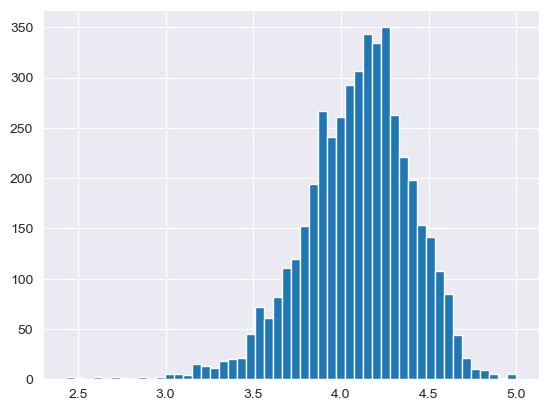

In [157]:
final_df.Score.hist(bins=50)

<Axes: >

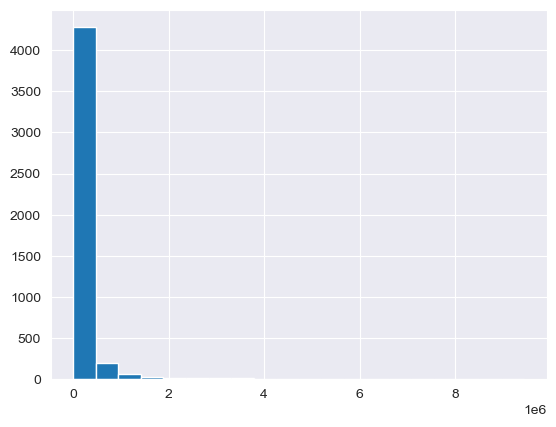

In [158]:
final_df.Ratings.hist(bins=20)

<Axes: >

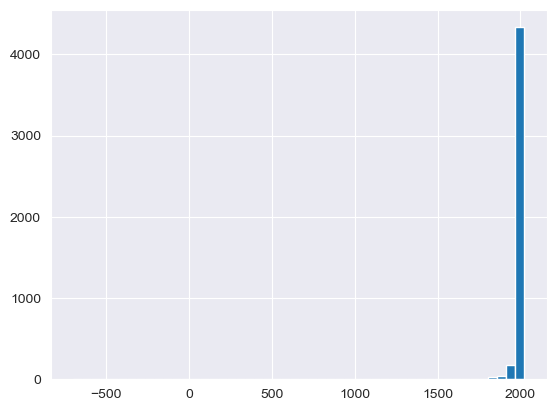

In [159]:
final_df.Published.hist(bins=50)

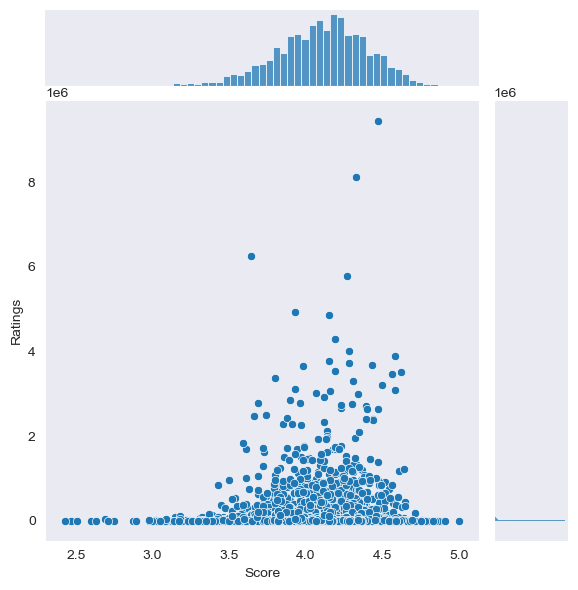

In [161]:
sns.jointplot(x='Score', y='Ratings', data=final_df)

<Axes: >

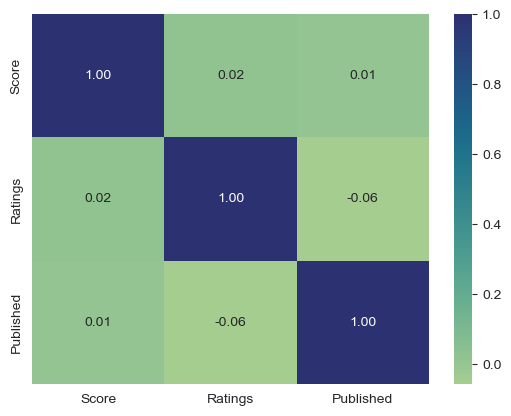

In [162]:
sns.heatmap(final_df.corr(), annot=True, fmt='.2f', cmap='crest')

On inspecting I found that the coverWrapper class contains the book info such as the link to the book page, its title and image.

In [15]:
book_link = crime_doc.find_all('div', class_='coverWrapper')[99].a['href']
book_title = crime_doc.find_all('div', class_='coverWrapper')[99].img['alt']
book_img = crime_doc.find_all('div', class_='coverWrapper')[99].img['src']

In [19]:
crime_doc.find_all('div')[0]

<div data-react-class="ReactComponents.StoresInitializer" data-react-props="{}"><noscript data-react-checksum="-1445129965" data-reactid=".jkgx24ois4"></noscript></div>

The Southern Lawyer (Joe Hennessy Legal Thriller #1)


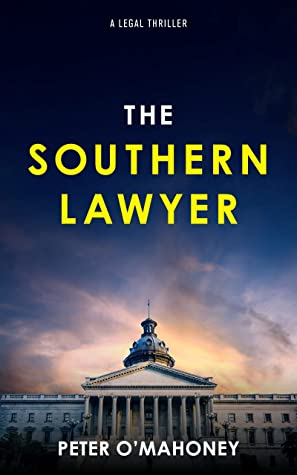

In [16]:
print(book_title)
display(Image(book_img, width=100))

Let's go to the book page to find out more about the book

In [32]:
book_url = base_url + book_link
book_url

'https://www.goodreads.com/book/show/53450790-the-perfect-marriage'

In [33]:
response = requests.get(book_url)
book_html = BeautifulSoup(response.text, 'html.parser')

In [76]:
len(book_html.text)

44825

The book page takes a lot of time to load so it would not be convenient to go through all the most read books in every single genre. Instead we can select a single book and do its analysis fully. We can extract the author, rating, reviews and analyze them.

## Analyzing a single book fully

The metadata contains info such as author, rating and number of reviews

In [231]:
author_name = book_html.find('div', class_= 'BookPageMetadataSection__contributor').text
print(f"Author: {author_name}")

AttributeError: 'NoneType' object has no attribute 'text'

In [114]:
book_score = book_html.find('div', class_= 'RatingStatistics__column').text
print(f"Score: {book_score}")

Score: 4.00


In [113]:
num_ratings, num_reviews = book_html.find('div', class_='RatingStatistics__meta')['aria-label'].split('and')
print(f"Number of ratings given: {num_ratings}")
print(f"Number of reviews given: {num_reviews}")

Number of ratings given: 392,809 ratings 
Number of reviews given:  30,626 reviews


In [120]:
book_desc = book_html.find('div', class_= 'BookPageMetadataSection__description').text
print(f"Description:\n\n {book_desc}")

Description:

 Would you defend your husband if he was accused of killing his mistress?Sarah Morgan is a successful and powerful defense attorney in Washington D.C. At 33 years old, she is a named partner at her firm and life is going exactly how she planned.The same cannot be said for her husband, Adam. He is a struggling writer who has had little success in his career. He begins to tire of his and Sarah’s relationship as she is constantly working. Out in the secluded woods, at Adam and Sarah’s second home, Adam engages in a passionate affair with Kelly Summers.Then, one morning everything changes. Adam is arrested for Kelly’s murder. She had been found stabbed to death in Adam and Sarah’s second home. Sarah soon finds herself playing the defender for her own husband, a man accused of murdering his mistress. But is Adam guilty or is he innocent?


In [142]:
num_pages, edition = book_html.find('div', class_= 'BookDetails').find_all('p')[0].text.split(',')
date_published = " ".join(book_html.find('div', class_= 'BookDetails').find_all('p')[1].text.split()[2:])
print(f"Number of pages: {num_pages}")
print(f"Edition: {edition}")
print(f"Publishing date: {date_published}")

Number of pages: 342 pages
Edition:  Paperback
Publishing date: July 3, 2020


In [143]:
author_profile = book_html.find('div', class_= 'FeaturedPerson__avatar').a['href']
author_profile

'https://www.goodreads.com/author/show/20309584.Jeneva_Rose'

Author profiles can be analyzed similarly. You just have to know how to extract the relevant tags from the html.

## Optional

Profile Image for Jeneva Rose.


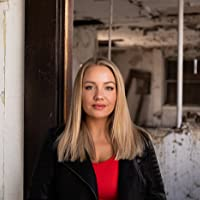

In [145]:
# optional
img_text = book_html.find('div', class_= 'FeaturedPerson__avatar').img['alt']
img = book_html.find('div', class_= 'FeaturedPerson__avatar').img['src']
print(img_text)
display(Image(img, width=100))

In [208]:
num_followers = book_html.find('div' ,class_='FeaturedPerson__infoPrimary').find_all('span')[-1].text.split()[0]
print(f"Number of followers of {author_name}: {num_followers}")

Number of followers of Jeneva Rose: 7,520


In [209]:
num_books = book_html.find('div' ,class_='FeaturedPerson__infoPrimary').find_all('span')[-2].text.split()[0]
print(f"Number of books written by {author_name}: {num_books}")

Number of books written by Jeneva Rose: 9


In [328]:
book_html.find('div', class_= 'RatingsHistogram__labelTotal')['aria-label'],\
[x.text for x in book_html.find_all('div', class_= 'RatingsHistogram__labelTitle')],\
[x.text for x in book_html.find_all('div', class_= 'RatingsHistogram__labelTotal')]

('Number of ratings and percentage of total ratings',
 ['5 stars', '4 stars', '3 stars', '2 stars', '1 star'],
 ['5,895 (47%)', '3,900 (31%)', '1,868 (15%)', '414 (3%)', '287 (2%)'])

### Reviews

In [373]:
book_html.find_all('article', class_= 'ReviewCard')[0]['aria-label']

'Review by Vickie'

In [376]:
book_html.find_all('section', class_= 'ReviewCard__content')[0].a.text

'May 1, 2023'

In [381]:
book_html.find_all('section', class_= 'ReviewCard__content')[0].span['aria-label']

'Rating 5 out of 5'

In [369]:
book_html.find_all('section', class_= 'ReviewText__content')[0].text

"This beautifully written book is about a mother and her daughter at a crucial point in both of their lives. It's a story of coping with grief and learning how to go on with life and how to rely on other people to help you through difficult times in life.Dani is an artist and has just learned that due to an eye disease, she'll be losing her vision in the future. Her life is in turmoil, her ex-husband (but still good friend) has just died in a car accident and she's working to help her daughter Bella cope with life without her dad in it. Dani decides to move from their home in the Outer Banks of NC to an inland farm near the Virginia border and she's taking Bella away from the only home that she's ever known. Bella feels betrayed - not only does she have to learn to navigate life without her father but she's left behind all of her friends and the comfort of a home she loved. Most of the time, instead of lashing out at her mother, she stuffs her feelings inside and works to present a cal

## Combining all of it

### Book info

In [283]:
# Helper functions
# Returns a dictionary containing information about the book given its html
def get_book_metadata(book_html):
    
    book_title = book_html.find('div', class_='BookPageTitleSection').text
    author_name = book_html.find('div', class_= 'BookPageMetadataSection__contributor').text
    book_score = book_html.find('div', class_= 'RatingStatistics__column').text
    num_ratings, num_reviews = book_html.find('div', class_='RatingStatistics__meta')['aria-label'].split('and')
    book_desc = book_html.find('div', class_= 'BookPageMetadataSection__description').text
    num_pages, edition = book_html.find('div', class_= 'BookDetails').find_all('p')[0].text.split(',')
    date_published = " ".join(book_html.find('div', class_= 'BookDetails').find_all('p')[1].text.split()[2:])
    
    book_info = {'Title': book_title,
                 'Author': author_name,
                 'Score': book_score,
                 'Num_ratings': num_ratings,
                 'Num_reviews': num_reviews,
                 'Num_pages': num_pages,
                 'Edition': edition,
                 'Publishing_date': date_published,
                 'Description': book_desc}
    
    return book_info

# Display information about the book from the dictionary
def display_book(book, book_img):
    print(book['Title'])
    display(Image(book_img, width=100))
    print(f"Author: {book['Author']}")
    print(f"Score : {book['Score']} out of 5")
    print(f"Number of ratings given: {book['Num_ratings']}")
    print(f"Number of reviews given: {book['Num_reviews']}")
    print(f"\nDescription of the book:\n\n {book['Description']}\n")
    print(f"Number of pages: {book['Num_pages']}")
    print(f"Edition: {book['Edition']}")
    print(f"Publishing date: {book['Publishing_date']}")

In [284]:
# Most important function
# Displays all the information about a book listed on the book's page
def get_book_info(book_url):
    r = requests.get(book_url)
    book_html = BeautifulSoup(r.text, 'html.parser')
    book_img = book_html.find('img', class_='ResponsiveImage')['src']
    
    book = get_book_metadata(book_html)
    display_book(book, book_img)

In [ ]:
get_book_info()

### Find books by genre and rank

In [288]:
def get_books_by_rank(genre_doc, rank):  
    '''
    Get book info about a book ranked among the given genre
    '''
    book_link = genre_doc.find_all('div', class_='coverWrapper')[rank-1].a['href']
    book_url = base_url + book_link
    print(f"Rank #{rank} ")    
    get_book_info(book_url)

In [289]:
def get_books_by_genre(genre_links_dict, genre, rank):
    '''
    Get any book from any genre by popularity i.e. rank
    '''
    genre_link = genre_links_dict[genre]
    response = requests.get(genre_link)
    genre_doc = BeautifulSoup(response.text, 'html.parser')
    print(f"Most popular books from the {genre} genre")   
    get_books_by_rank(genre_doc, rank)

Let's get the top ranked book from the science fiction genre

Rank: 1
The Midnight Library


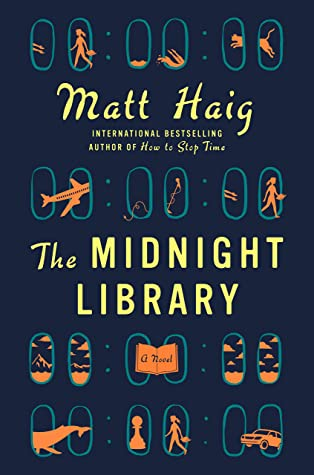

Author: Matt Haig
Score : 4.01 out of 5
Number of ratings given: 1,417,215 ratings 
Number of reviews given:  152,766 reviews

Description of the book:

 Between life and death there is a library, and within that library, the shelves go on forever. Every book provides a chance to try another life you could have lived. To see how things would be if you had made other choices . . . Would you have done anything different, if you had the chance to undo your regrets? A novel about all the choices that go into a life well lived.Somewhere out beyond the edge of the universe there is a library that contains an infinite number of books, each one the story of another reality. One tells the story of your life as it is, along with another book for the other life you could have lived if you had made a different choice at any point in your life. While we all wonder how our lives might have been, what if you had the chance to go to the library and see for yourself? Would any of these other lives trul

In [287]:
get_books_by_genre(genre_links_dict, genre='Science Fiction', rank=1)

## Finding most shelved books by genre (for kaggle)

Exploring the most popular books. Have to change the urls again ):

In [291]:
print(genre_names[-9:])

['Science', 'Science Fiction', 'Self Help', 'Suspense', 'Spirituality', 'Sports', 'Thriller', 'Travel', 'Young Adult']


Let's start with the mystery genre

In [28]:
genre_most_popular_dict = {name: base_url + "/shelf/show" + link[7:] for (name, link) in zip(genre_names, genre_links)}
genre_most_popular_dict["Children's"] = "https://www.goodreads.com/shelf/show/childrens"
genre_most_popular_dict['Gay and Lesbian'] = "https://www.goodreads.com/shelf/show/lgbt"
genre_most_popular_dict['Humor and Comedy'] = "https://www.goodreads.com/shelf/show/humor"
genre_most_popular_dict

{'Art': 'https://www.goodreads.com/shelf/show/art',
 'Biography': 'https://www.goodreads.com/shelf/show/biography',
 'Business': 'https://www.goodreads.com/shelf/show/business',
 'Chick Lit': 'https://www.goodreads.com/shelf/show/chick-lit',
 "Children's": 'https://www.goodreads.com/shelf/show/childrens',
 'Christian': 'https://www.goodreads.com/shelf/show/christian',
 'Classics': 'https://www.goodreads.com/shelf/show/classics',
 'Comics': 'https://www.goodreads.com/shelf/show/comics',
 'Contemporary': 'https://www.goodreads.com/shelf/show/contemporary',
 'Cookbooks': 'https://www.goodreads.com/shelf/show/cookbooks',
 'Crime': 'https://www.goodreads.com/shelf/show/crime',
 'Ebooks': 'https://www.goodreads.com/shelf/show/ebooks',
 'Fantasy': 'https://www.goodreads.com/shelf/show/fantasy',
 'Fiction': 'https://www.goodreads.com/shelf/show/fiction',
 'Gay and Lesbian': 'https://www.goodreads.com/shelf/show/lgbt',
 'Graphic Novels': 'https://www.goodreads.com/shelf/show/graphic-novels',
 '

Let's analyze some thriller books from the thriller url

In [99]:
thriller_url = genre_most_popular_dict['Sports']
response = requests.get(thriller_url)
doc = BeautifulSoup(response.text, 'html.parser')

In [294]:
# doc.find_all('div', class_='left')[0].text.strip().split('\n')

In [100]:
# All book tags from the thriller genre
book_tags = doc.find_all('div', class_="left")

In [101]:
book_titles = [tag.find_all('a')[0]['title'] for tag in book_tags]
book_titles[:5]

['Moneyball: The Art of Winning an Unfair Game',
 'The Deal (Off-Campus, #1)',
 'The Wall of Winnipeg and Me',
 'Kulti',
 'The Mistake (Off-Campus, #2)']

Looks like thriller authors are obsessed with girls. Anyway let's analyze further

In [102]:
book_urls = [base_url + tag.find_all('a')[0]['href'] for tag in book_tags]
book_urls[:5]

['https://www.goodreads.com/book/show/1301.Moneyball',
 'https://www.goodreads.com/book/show/45484397-the-deal',
 'https://www.goodreads.com/book/show/29367958-the-wall-of-winnipeg-and-me',
 'https://www.goodreads.com/book/show/24044596-kulti',
 'https://www.goodreads.com/book/show/45756920-the-mistake']

In [103]:
book_imgs = [tag.find('img')['src'] for tag in book_tags]

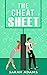

In [104]:
display(Image(book_imgs[49], width=70))

In [105]:
author_links = [tag.find_all('a')[2]['href'] for tag in book_tags]
author_links[:5]

['https://www.goodreads.com/author/show/776.Michael_Lewis',
 'https://www.goodreads.com/author/show/1935000.Elle_Kennedy',
 'https://www.goodreads.com/author/show/5760202.Mariana_Zapata',
 'https://www.goodreads.com/author/show/5760202.Mariana_Zapata',
 'https://www.goodreads.com/author/show/1935000.Elle_Kennedy']

In [106]:
author_names = [tag.find('span', itemprop="name").text for tag in book_tags]
author_names[:5]

['Michael   Lewis',
 'Elle Kennedy',
 'Mariana Zapata',
 'Mariana Zapata',
 'Elle Kennedy']

In [110]:
book_tags[33].find('span', class_="greyText smallText").text.strip()

'avg rating 4.02 —\n                70,519 ratings  —\n                published'

In [107]:
scores_list, ratings_list, year_published_list = [], [], []
for i, tag in enumerate(book_tags):
    print(i)
    score, num_ratings, year_published = tag.find('span', class_="greyText smallText").text.strip().split('\n')
    score = score.strip()[11:15]
    num_ratings = num_ratings.strip().split()[0]
    year_published = year_published.strip().split()[1]
    scores_list.append(score)
    ratings_list.append(num_ratings)
    year_published_list.append(year_published)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


IndexError: list index out of range

In [126]:
print(f"Top 5 books scores: {scores_list[:5]}")
print(f"Top 5 books ratings: {ratings_list[:5]}")
print(f"Top 5 books publishing year: {year_published_list[:5]}")

Top 5 books scores: ['4.12', '3.96', '4.18', '3.91', '4.16']
Top 5 books ratings: ['2,924,882', '2,779,021', '1,684,766', '2,273,746', '3,064,289']
Top 5 books publishing year: ['2012', '2015', '2019', '2003', '2005']


Combining all of the above together we can make a dictionary for each of the books depicting its title, url, author, scores etc. This way it will be easy to lookup info about any book

In [127]:
book_info_dicts = []
for (title, author, score, num_ratings, year_published) in \
zip(book_titles, author_names, scores_list, ratings_list, year_published_list):
    book_info =  {'Title': title, 
                  'Author': author, 
                  'Score': score, 
                  'Num_ratings': num_ratings, 
                  'Year_published': year_published}
    book_info_dicts.append(book_info)

In [128]:
book_info_dicts

[{'Title': 'Gone Girl',
  'Author': 'Gillian Flynn',
  'Score': '4.12',
  'Num_ratings': '2,924,882',
  'Year_published': '2012'},
 {'Title': 'The Girl on the Train',
  'Author': 'Paula Hawkins',
  'Score': '3.96',
  'Num_ratings': '2,779,021',
  'Year_published': '2015'},
 {'Title': 'The Silent Patient',
  'Author': 'Alex Michaelides',
  'Score': '4.18',
  'Num_ratings': '1,684,766',
  'Year_published': '2019'},
 {'Title': 'The Da Vinci Code (Robert Langdon, #2)',
  'Author': 'Dan Brown',
  'Score': '3.91',
  'Num_ratings': '2,273,746',
  'Year_published': '2003'},
 {'Title': 'The Girl with the Dragon Tattoo (Millennium, #1)',
  'Author': 'Stieg Larsson',
  'Score': '4.16',
  'Num_ratings': '3,064,289',
  'Year_published': '2005'},
 {'Title': 'Angels & Demons (Robert Langdon, #1)',
  'Author': 'Dan Brown',
  'Score': '3.93',
  'Num_ratings': '3,101,296',
  'Year_published': '2000'},
 {'Title': 'Verity',
  'Author': 'Colleen Hoover',
  'Score': '4.35',
  'Num_ratings': '2,105,722',
  '

In [129]:
thriller_df = pd.DataFrame(book_info_dicts)

In [131]:
thriller_df.head()

,Title,Author,Score,Num_ratings,Year_published
0,Gone Girl,Gillian Flynn,4.12,"2,924,882",2012
1,The Girl on the Train,Paula Hawkins,3.96,"2,779,021",2015
2,The Silent Patient,Alex Michaelides,4.18,"1,684,766",2019
3,"The Da Vinci Code (Robert Langdon, #2)",Dan Brown,3.91,"2,273,746",2003
4,"The Girl with the Dragon Tattoo (Millennium, #1)",Stieg Larsson,4.16,"3,064,289",2005


In [329]:
# thriller_df['Score'] = thriller_df['Score'].astype('float')
# thriller_df.info()

In [330]:
# thriller_df.groupby('Author')['Title'].count().sort_values(ascending=False)

In [111]:
# Helper functions
def get_book_metadata(book_tag):
    book_title = book_tag.find_all('a')[0]['title']
    book_url = base_url + book_tag.find_all('a')[0]['href'] 
    
    book_img = book_tag.find('img')['src']
#     display(Image(book_img, width=70))

    author_link = book_tag.find_all('a')[2]['href']
    author_name = book_tag.find('span', itemprop="name").text
    
    score, num_ratings, year_published = book_tag.find('span', class_="greyText smallText").text.strip().split('\n')
    try:
        score = score.strip()[11:15]
        num_ratings = num_ratings.strip().split()[0]
        year_published = year_published.strip().split()[1]
    except:
        pass
    
    book_info = {'Title': book_title,
                 'Author': author_name,
                 'Score': score,
                 'Ratings': num_ratings,
                 'Published': year_published}
    
    return book_info

In [112]:
def get_popular_books(genre):
    response = requests.get(genre_most_popular_dict[genre])
    doc = BeautifulSoup(response.text, 'html.parser')
    
    book_tags = doc.find_all('div', class_="left")
    book_metadata_list = []
    for tag in book_tags:
        book_info_dict = get_book_metadata(tag)
        book_info_dict['Genre'] = genre
        book_metadata_list.append(book_info_dict)
    
    return book_metadata_list

In [113]:
list(genre_most_popular_dict)[:36]

['Art',
 'Biography',
 'Business',
 'Chick Lit',
 "Children's",
 'Christian',
 'Classics',
 'Comics',
 'Contemporary',
 'Cookbooks',
 'Crime',
 'Ebooks',
 'Fantasy',
 'Fiction',
 'Gay and Lesbian',
 'Graphic Novels',
 'Historical Fiction',
 'History',
 'Horror',
 'Humor and Comedy',
 'Manga',
 'Memoir',
 'Music',
 'Mystery',
 'Nonfiction',
 'Paranormal',
 'Philosophy',
 'Poetry',
 'Psychology',
 'Religion',
 'Romance',
 'Science',
 'Science Fiction',
 'Self Help',
 'Suspense',
 'Spirituality']

In [114]:
# Ebooks doesn't have any books
def popular_book_scraper():
    for i, genre in enumerate(genre_most_popular_dict):
        if genre in list(genre_most_popular_dict)[:36]:
            continue
#         if os.path.exists(f'{genre}.csv'):
#             print(f"{genre}.csv already exists. Skipping....")
#             continue
        time.sleep(2*(i%10))
        print(f"Scraping {genre} popular books")
        genre_dict = get_popular_books(genre)
        print(len(genre_dict))
        make_csv(genre_dict, f"{genre}.csv")
        print(f"Writing to file {genre}.csv")
        print(f"Scraped {i+1}/{len(genre_most_popular_dict)} genres")
        print('='*30)

In [115]:
%%time
popular_book_scraper()

Scraping Sports popular books
50
Writing to file Sports.csv
Scraped 37/40 genres
Scraping Thriller popular books
50
Writing to file Thriller.csv
Scraped 38/40 genres
Scraping Travel popular books
50
Writing to file Travel.csv
Scraped 39/40 genres
Scraping Young Adult popular books
50
Writing to file Young Adult.csv
Scraped 40/40 genres
CPU times: total: 469 ms
Wall time: 1min 10s
